## Machine Project
**Name:** Sean Adrien I. Regindin  
**Section:** XX22  

## Data Collection

**Survey Design**
- Conducted nationwide every quarter
- Aims to capture up-to-date demographic and socio-economic characteristics
- Focuses on employment, unemployment, and underemployment trends

**Coverage and Sample Size**
- Approximately 42,768 households per round (with Batanes)
- The sample was selected to allow separate estimates for the national level, and regional levels only (17 administrative regions)
- Multi-stage stratified sample of private households
- The household is the reporting unit; all members contribute data

**Method**
- Trained surveyors conduct face-to-face interviews at sampled households
- The people who were surveyed answered a standard questionnaire (ISH Form 2) that captures:
  - Geographic and household identifiers
  - Demographic characteristics (age, sex, etc.)
  - Labor and economic activities for members aged 15+
- Interviewers record both pre-coded responses and write-in entries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 📦 Library Imports

We begin by importing three essential Python libraries for data analysis and visualization:

- **NumPy (np)**: Enables efficient numerical computations using arrays and matrices. Ideal for mathematical operations like dot products, statistical analysis, and linear algebra.
  
- **Pandas (pd)**: Provides high-performance data structures such as `DataFrame` and `Series`, making it easy to load, manipulate, and analyze structured datasets. Supports file I/O with formats like CSV, Excel, and JSON.

- **Matplotlib (plt)**: A versatile plotting library used to create a wide variety of static, animated, and interactive visualizations. Common uses include line graphs, bar charts, scatter plots, and histograms.

These libraries form the backbone of most data science workflows and will be used throughout this notebook to load, process, and visualize data.

In [2]:
labor_df = pd.read_csv('LFS_PUF_April_2016.CSV')
labor_df.head()

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1


## Initial Data Reading and Cleaning

**1.** Inspect the Data

We start by reading the CSV file `LFS_PUF_April_2016.CSV` into a Pandas DataFrame named `labor_df`. This dataset contains microdata from the Philippine Labor Force Survey (LFS) for April 2016.

Using `labor_df.head()`, we inspect the first five rows to get a sense of the column names and values. The dataset includes 50 columns, with identifiers like:
- `PUFREG`, `PUFPRV`: Regional and provincial codes
- `PUFHHNUM`: Household number
- `PUFPWGTFIN`: Survey weights
- `PUFSVYMO`, `PUFSVYYR`: Survey month and year
- `PUFRPL`: Response pool identifiers
- and etc. (other variables will be discussed later)


In [3]:
labor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  int64  
 1   PUFPRV           180862 non-null  int64  
 2   PUFPRRCD         180862 non-null  int64  
 3   PUFHHNUM         180862 non-null  int64  
 4   PUFURB2K10       180862 non-null  int64  
 5   PUFPWGTFIN       180862 non-null  float64
 6   PUFSVYMO         180862 non-null  int64  
 7   PUFSVYYR         180862 non-null  int64  
 8   PUFPSU           180862 non-null  int64  
 9   PUFRPL           180862 non-null  int64  
 10  PUFHHSIZE        180862 non-null  int64  
 11  PUFC01_LNO       180862 non-null  int64  
 12  PUFC03_REL       180862 non-null  int64  
 13  PUFC04_SEX       180862 non-null  int64  
 14  PUFC05_AGE       180862 non-null  int64  
 15  PUFC06_MSTAT     180862 non-null  object 
 16  PUFC07_GRADE     180862 non-null  obje

### Dataset Summary
Running `labor_df.info()` gives us a concise summary:
- Total entries: 180,862
- Column count: 50
- Data types: Mostly `int64`, `float64` and `object`

This overview helps us plan data cleaning and feature engineering steps later on.=

In [4]:
labor_df.describe()

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,PUFHHSIZE,PUFC01_LNO,PUFC03_REL,PUFC04_SEX,PUFC05_AGE
count,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.0,180862.0,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000,180862.000000
mean,9.398801,45.825309,4585.055324,20528.231873,1.574947,568.527169,4.0,2016.0,386.270272,2.490379,5.504783,3.252391,2.931489,1.493874,27.889772
std,4.667034,24.939767,2494.028733,11827.708144,0.494352,508.519331,0.0,0.0,440.160045,1.118970,2.370169,2.077130,1.832299,0.499964,20.052132
min,1.000000,1.000000,100.000000,1.000000,1.000000,34.998400,4.0,2016.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5.000000,24.000000,2402.000000,10256.250000,1.000000,245.065975,4.0,2016.0,107.000000,1.000000,4.000000,2.000000,2.000000,1.000000,11.000000
50%,10.000000,46.000000,4600.000000,20406.000000,2.000000,392.993500,4.0,2016.0,243.000000,2.000000,5.000000,3.000000,3.000000,1.000000,24.000000
75%,13.000000,71.000000,7100.000000,30962.000000,2.000000,679.526775,4.0,2016.0,482.000000,3.000000,7.000000,4.000000,3.000000,2.000000,42.000000
max,17.000000,98.000000,9804.000000,40880.000000,2.000000,4509.316000,4.0,2016.0,3053.000000,4.000000,23.000000,23.000000,11.000000,2.000000,99.000000


To understand the distribution and structure of the dataset, we applied the following exploratory commands:

### `labor_df.describe()`
This method returns summary statistics for all numeric columns:
- **Count**: Confirms that each column has 180,862 entries.
- **Mean & Std**: Provide insight into central tendencies and spread. For instance, `PUFWGTFIN` (survey weights) has a high standard deviation, suggesting variability in sample weighting.
- **Min/Max**: Show the range of values for each column.
- **Quartiles (25%, 50%, 75%)**: Help reveal skewness and detect potential outliers.

Notable columns include:
- `PUFREG`, `PUFPRV`, and `PUFPRRCD`: Geographical and administrative codes.
- `PUFWGTFIN`: Survey weights important for aggregation.
- `PUFSVYYR` and `PUFSYVMO`: Year and month of the survey, confirming it’s April 2016.

In [5]:
labor_df.isnull().sum()

PUFREG             0
PUFPRV             0
PUFPRRCD           0
PUFHHNUM           0
PUFURB2K10         0
PUFPWGTFIN         0
PUFSVYMO           0
PUFSVYYR           0
PUFPSU             0
PUFRPL             0
PUFHHSIZE          0
PUFC01_LNO         0
PUFC03_REL         0
PUFC04_SEX         0
PUFC05_AGE         0
PUFC06_MSTAT       0
PUFC07_GRADE       0
PUFC08_CURSCH      0
PUFC09_GRADTECH    0
PUFC10_CONWR       0
PUFC11_WORK        0
PUFC12_JOB         0
PUFC14_PROCC       0
PUFC16_PKB         0
PUFC17_NATEM       0
PUFC18_PNWHRS      0
PUFC19_PHOURS      0
PUFC20_PWMORE      0
PUFC21_PLADDW      0
PUFC22_PFWRK       0
PUFC23_PCLASS      0
PUFC24_PBASIS      0
PUFC25_PBASIC      0
PUFC26_OJOB        0
PUFC27_NJOBS       0
PUFC28_THOURS      0
PUFC29_WWM48H      0
PUFC30_LOOKW       0
PUFC31_FLWRK       0
PUFC32_JOBSM       0
PUFC33_WEEKS       0
PUFC34_WYNOT       0
PUFC35_LTLOOKW     0
PUFC36_AVAIL       0
PUFC37_WILLING     0
PUFC38_PREVJOB     0
PUFC40_POCC        0
PUFC41_WQTR  

### `labor_df.isnull().sum()`

Used to identify missing values across columns. In this case, all inspected columns reported **zero missing values**, indicating a clean dataset — perfect for immediate preprocessing and modeling.

### Dataset Info

The output indicates that the dataframe contains 50 variables and 180,862 observations.
To assist the reader in understanding the dataset, the following is a list of variable names along with the type of data they represent:

- **`PUFREG`**:             Region
- **`PUFPRV`**:              Province code
- **`PUFPRRCD`**:            Province recode
- **`PUFHHNUM`**:            Household unique sequential number
- **`PUFURB2K10`**:           Urban / Rural in FIES 2010 survey
- **`PUFPWGTFIN`**:           Final weight based on projection
- **`PUFSVYMO`**:             Survey month
- **`PUFSVYYR`**:             Survey year
- **`PUFPSU`**:               PSU number
- **`PUFRPL`**:               Replicate
- **`PUFHHSIZE`**:            Number of household members
- **`PUFC01_LNO`**:           Line number used to identify each member of the household in
                            the survey
- **`PUFC03_REL`**:           Relationship of the person to the household head
- **`PUFC04_SEX`**:           Sex of the person
- **`PUFC05_AGE`**:           Age of the person since last birthday
- **`PUFC06_MSTAT`**:         Marital status of the person since last birthday
- **`PUFC07_GRADE`**:         Highest grade completed of the person
- **`PUFC08_CURSCH`**:        Is the person currently attending school?
- **`PUFC09_GRADTECH`**:      Is the person a graduate of a technical / vocational course?
- **`PUFC10_CONWR`**:         Category of OFW
- **`PUFC11_WORK`**: Did the person do any work for at least one house during the
past week?
- **`PUFC12_JOB`**: Although the person did not work last week, did the person have
a job or business during the past week?
- **`PUFC14_PROCC`**: What is the primary occupation of the person during the past
week?
- **`PUFC16_PKB`**: Kind of business or industry of the person
- **`PUFC17_NATEM`**: Nature of employment of the person.
This refers to the permanence or regularity or seasonality with
which a particular work or job/business is being pursued.
- **`PUFC18_PNWHRS`**: Normal working hours per day
Normal working hours worked per day is the usual or
prescribed working hours of a person in his primary
job/business, which is, considered a full day's work.
- **`PUFC19_PHOURS`**: Total number of hours worked during the past week
The actual number of hours worked by a person in his primary
job that he held during the past week or in his other
job(s)/business if there are or if there is any.
It includes the duration or the period the person was occupied
in his work, including overtime, but excluding hours paid but
not worked. For wage and salary earners, it includes time
worked without compensation in connection with their
occupations, such as the time a teacher spends at home
preparing for the forthcoming lectures. For own account
workers, it includes the time spent in the shop, business or
office, even if no sale or transaction has taken place.
- **`PUFC20_PWMORE`**: Do you want more hours of work during the past week?
- **`PUFC21_PLADDW`**: Did the person look for additional work during the past week?
- **`PUFC22_PFWRK`**: Was this the person’s first time to do any work?
This question determines whether a person is a “new entrant”
to the labor force. A person is a new entrant if it is his first time
to do any work.
A person is considered to have worked only for the first time if
he started working only during the current survey period.
Current survey period refers to April 1 - 30 for this survey
round.
- **`PUFC23_PCLASS`**: Class of worker for primary occupation
Class of worker is the relationship of the worker to the
establishment where he works.
- **`PUFC24_PBASIS`**: Basis of payment for primary occupation
- **`PUFC25_PBASIC`**: Basic pay per day for primary occupation
Basic pay is the pay for normal time, prior to deductions of
social security contributions, withholding taxes, etc. It excludes
allowances, bonuses, commissions, overtime pay, benefits in
kind, etc. This is also called basic wage.
- **`PUFC26_OJOB`**: Did the person have other job or business during the past week?
- **`PUFC27_NJOBS`**: Number of jobs the person had during the past week
- **`PUFC28_THOURS`**: Total number of hours worked by the person for all his jobs
during the past week
- **`PUFC29_WWM48H`**: Main reason for not working more than 48 hours in the past
week
- **`PUFC30_LOOKW`**: Did the person look for work or try to establish a business in
the past week?
- **`PUFC31_FLWRK`**: Was it the person’s first time looking for work or trying to
establish a business?
- **`PUFC32_JOBSM`**: Job search method
What has the person been doing to find work?
- **`PUFC33_WEEKS`**: Number of weeks spent in looking for work
How many weeks has the person been looking for work?
- **`PUFC34_WYNOT`**: Reason for not looking for work
Why did the person not look for work?
- **`PUFC35_LTLOOKW`**: When was the last time the person looked for work?
- **`PUFC36_AVAIL`**: Had opportunity for work existed last week or within two weeks,
would the person have been available?
- **`PUFC37_WILLING`**: Is the person willing to take up work in the past week or within
2 weeks?
- **`PUFC38_PREVJOB`**: Has the person worked at any time before?
- **`PUFC40_POCC`**: What was the person’s last occupation?
- **`PUFC41_WQTR`**: Did the person work at all or had a job or business during the
past quarter?
- **`PUFC43_QKB`**: Kind of business for the past quarter
- **`PUFNEWEMPSTAT`**: New Employment Criteria

-----------

## Research Question and EDAs

**Research Question:**
What are the underlying demographic and educational patterns that influence the classification of workers in the labor force, and how do sex, age, and educational attainment interact to shape occupational categories in the dataset?


**EDA Questions**
These questions can help me gain insight into the structure of the data and also expose conditional relationships that can explain the Rule Mining outputs later
1. How does educational attainment vary across different age groups and sexes, and what trends emerge in academic progression over time?
2. What are the most common classifications of workers across various combinations of age and education, and how concentrated are specific job classes within these demographic groups?
3. Is there a significant relationship between sex and the class of worker, and does educational attainment mediate this relationship?

---

## EDA Question 1
Let's find out how educational attainment varies across different age groups and sexes, and what trends emerge in academic progression over time?

For this question, the variables PUFC04_SEX, PUFC05_AGE, and PUFC07_GRADE were taken and stored to another dataframe.

In [6]:
df_filter = labor_df[['PUFC04_SEX', 'PUFC05_AGE', 'PUFC07_GRADE']].dropna()
df_filter.head()

,PUFC04_SEX,PUFC05_AGE,PUFC07_GRADE
0,1,49,350
1,2,61,350
2,1,19,350
3,1,48,320
4,2,41,350


The code snippet above creates a filtered dataset with relevant columns and removes any rows containing missing values

In [7]:
print("Unique values for PUFC04_SEX:")
print(df_filter['PUFC04_SEX'].value_counts(dropna=False), "\n")

print("Unique values for PUFC05_AGE:")
print(df_filter['PUFC05_AGE'].describe())
print("Sorted unique ages:", sorted(df_filter['PUFC05_AGE'].dropna().unique()), "\n")

print("Unique values for PUFC07_GRADE:")
print(df_filter['PUFC07_GRADE'].value_counts(dropna=False).sort_index(), "\n")


Unique values for PUFC04_SEX:
PUFC04_SEX
1    91539
2    89323
Name: count, dtype: int64 

Unique values for PUFC05_AGE:
count    180862.000000
mean         27.889772
std          20.052132
min           0.000000
25%          11.000000
50%          24.000000
75%          42.000000
max          99.000000
Name: PUFC05_AGE, dtype: float64
Sorted unique ages: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] 

Unique values for PUFC07_GRADE:
PUFC07_GRADE
       18339
000     5079
010     4446
210     5648
220     6551
       ...  
810     5613
820     5939
830     4297
840      561
900      420
Name: count, Length: 68, dtype: int64 



## Variable Exploration: Sex, Age, and Educational Attainment

We examined the distribution and diversity of values for three key variables in the April 2016 Labor Force Survey dataset:

---

### PUFC04_SEX
Represents the biological sex of respondents:
- **Value 1**: Male → 91,539 entries
- **Value 2**: Female → 89,323 entries
- Gender distribution is roughly balanced, supporting comparative analysis across sexes.

---

### PUFC05_AGE
Captures respondents’ age with the following characteristics:
- **Count**: 180,862 individuals
- **Mean Age**: ~27.89 years
- **Standard Deviation**: ~20.05
- **Age Range**: From 0 to 99 years
- **Quartiles**:
  - 25%: 11 years
  - 50% (Median): 24 years
  - 75%: 42 years
- The dataset includes children, working-age adults, and elderly individuals—perfect for lifecycle-focused analysis.

Sorted Unique Ages:
```python
[0, 1, 2, ..., 99]
```

---

### PUFC07_GRADE
Indicates the highest grade level completed:
- Most Frequent Values:
- '000' (No Grade Completed): 5,079 individuals
- '010', '210', '220'... indicate specific educational stages
- Total Unique Codes: 68 grade-level identifiers
- Uncoded/Missing Entries: 18,339 rows
This variable may be linked to the PSCED 2008 educational classification for deeper categorization. Values starting with 5 are observations which has completed and attained a bachelor's degree and those with 6 are observations which has masteral and doctorate degree.



In [8]:
# Preview random entries from the column
print(df_filter['PUFC07_GRADE'].sample(10, random_state=1))

170607    240
14975     280
170254    330
136056    350
25202     220
30673     310
136023    350
30646     220
100060    830
144467    614
Name: PUFC07_GRADE, dtype: object


A randomized selection of 10 entries reveals that grade codes appear as **three-character strings**, such as `'240'`, `'280'`, `'830'`, and `'614'`. These likely correspond to detailed educational stages under the PSCED 2008 framework.

```python
df_filter['PUFC07_GRADE'].sample(10, random_state=1)

In [9]:
print(df_filter['PUFC07_GRADE'].dtype)
print(df_filter['PUFC07_GRADE'].unique())

object
['350' '320' '250' '   ' '622' '672' '240' '220' '614' '330' '010' '280'
 '632' '310' '000' '900' '820' '230' '589' '572' '210' '830' '810' '634'
 '686' '581' '681' '552' '534' '840' '658' '548' '648' '652' '662' '601'
 '642' '562' '260' '685' '631' '684' '340' '584' '621' '410' '420' '664'
 '676' '521' '638' '554' '646' '689' '522' '654' '644' '532' '531' '514'
 '558' '501' '586' '542' '576' '544' '585' '564']


## Grade Code Structure and Data Type Analysis

To better understand the encoding of educational attainment levels, we reviewed the `PUFC07_GRADE` column from the filtered LFS dataset.

### Data Type Check

Using `df_filter['PUFC07_GRADE'].dtype`, we confirmed that:
- The column is of type `object`
- This suggests non-numeric strings or mixed formats, which is common when handling coded categorical variables like educational attainment

---

### Unique Code Exploration

We retrieved the full list of unique grade codes:

```python
df_filter['PUFC07_GRADE'].unique()

In [10]:
# Check how many unique values before cleaning
print("Unique cleaned grades:", df_filter['PUFC07_GRADE'].nunique())
df_filter = df_filter[df_filter['PUFC05_AGE'] >= 5]
# Check how many unique values after cleaning
print("Unique cleaned grades:", df_filter['PUFC07_GRADE'].nunique())

Unique cleaned grades: 68
Unique cleaned grades: 67


## Age-Based Filtering for Educational Attainment

We refined our dataset to include only respondents aged **5 years and above**, since the variable `PUFC07_GRADE` (educational attainment) only contains valid entries for individuals within this age bracket.

### Reason for Filtering

Respondents younger than 5 education are not recorded according to the ISH Form used to survey each household. Including them in the analysis would inflate missing or invalid values in `PUFC07_GRADE`, skewing the grade-level distribution and downstream insights.

```python
# Filter out respondents below 5 years old
df_filter = df_filter[df_filter['PUFC05_AGE'] >= 5]
```

### Result
After applying the filter:
- Unique grade codes dropped from 68 to 67, indicating that one invalid or empty entry was tied to ages below 5.
- The dataset is now focused on the school-age population, setting a stronger foundation for educational trend analysis.

In [11]:
print("Unique values for PUFC04_SEX:")
print(df_filter['PUFC04_SEX'].value_counts(dropna=False), "\n")

print("Unique values for PUFC05_AGE:")
print(df_filter['PUFC05_AGE'].describe())
print("Sorted unique ages:", sorted(df_filter['PUFC05_AGE'].dropna().unique()), "\n")

print("Unique values for PUFC07_GRADE:")
print(sorted(df_filter['PUFC07_GRADE'].unique()), "\n")


Unique values for PUFC04_SEX:
PUFC04_SEX
1    81989
2    80534
Name: count, dtype: int64 

Unique values for PUFC05_AGE:
count    162523.000000
mean         30.799253
std          19.072321
min           5.000000
25%          15.000000
50%          27.000000
75%          44.000000
max          99.000000
Name: PUFC05_AGE, dtype: float64
Sorted unique ages: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] 

Unique values for PUFC07_GRADE:
['000', '010', '210', '220', '230', '240', '250', '260', '280', '310', '320', '330', '340', '350', '410', '420', '501', '514', '521', '522', '531', '532', '534', '542', '544', '548', '552', '554', '558', '562', '564', '572', '576', 

## Unique Value Summary for Key Variables

We inspected unique values for three core columns in the filtered dataset (`df_filter`) where age ≥ 5. This confirms clean data distribution and prepares us for deeper analysis.

---

### `PUFC04_SEX`
```python
df_filter['PUFC04_SEX'].value_counts(dropna=False)
```
- 1 (Male): 81,989 entries
- 2 (Female): 80,534 entries
- Distribution remains balanced and reliable post-filtering

---
### `PUFC05_AGE`
- Count: 162,523
- Mean: 30.80
- Std Dev: 20.15
- Min/Max: 5 to 99
- Median (50%): 27 years
- Q1/Q3 (25%/75%): 15 and 44 years
- Indicates diverse age representation across school-age and working-age individuals

### `PUFC07_GRADE`
- Total Unique Grade Codes: 67
- Includes structured codes like '000', '010', '220', '350', '622', '830', '900'
- Likely aligned with PSCED 2008 classification of educational levels

This snapshot ensures our dataset is logically consistent and semantically valid for educational attainment modeling.

In [12]:
grade_ordinal = {
    '000': 0,   # No Grade Completed
    '010': 1,   # Preschool

    '210': 2, '220': 3, '230': 4, '240': 5, '250': 6, '260': 7, '280': 8,  # Elementary
    '310': 9, '320': 10, '330': 11, '340': 12, '350': 13,                  # High School
    '410': 14, '420': 15,                                                 # Post-Secondary
    '810': 16, '820': 17, '830': 18, '840': 19,                           # College
    '900': 21                                                             # Post-Baccalaureate
}


### Educational Attainment Ordinal Mapping

This dictionary converts PSCED 2008 codes into ordinal numerical values for use in data preprocessing and analysis. It's designed to preserve the order of educational levels while making the data suitable for models that require numerical input.

#### Mapping Breakdown

| Code        | Education Level           | Ordinal Value | Description                         |
|-------------|----------------------------|---------------|-------------------------------------|
| `'000'`     | No Grade Completed         | `0`           | No formal education                 |
| `'010'`     | Preschool                  | `1`           | Early childhood education           |
| `'210'`–`280` | Elementary               | `2`–`8`       | Grades 1–7                          |
| `'310'`–`350` | High School              | `9`–`13`      | Grades 8–12                         |
| `'410'`, `'420'` | Post-Secondary       | `14`–`15`     | Vocational/Technical Education      |
| `'810'`–`840` | College                  | `16`–`19`     | Undergraduate Years (1st to 4th)    |
| `'900'`     | Post-Baccalaureate         | `21`          | Graduate and advanced studies       |

> 🔎 Note: Ordinal value `20` is skipped for other classifications that will be discussed later

This mapping supports:
- Analytical consistency across educational data
- Comparative studies or visualization of academic trends

In [13]:
valid_grades = set(grade_ordinal.keys())

df_cleaned = df_cleaned = df_filter.copy()

# Map ordinal values using the dictionary
df_cleaned['GRADE_NUMERIC'] = df_cleaned['PUFC07_GRADE'].map(grade_ordinal)
df_cleaned

,PUFC04_SEX,PUFC05_AGE,PUFC07_GRADE,GRADE_NUMERIC
0,1,49,350,13.0
1,2,61,350,13.0
2,1,19,350,13.0
3,1,48,320,10.0
4,2,41,350,13.0
...,...,...,...,...
180854,2,9,210,2.0
180855,1,5,000,0.0
180857,1,29,350,13.0
180858,2,29,830,18.0


### Grade Code Mapping to Ordinal Values

This code performs ordinal encoding for PSCED 2008 grade levels to make educational data more suitable for machine learning and analysis. For more details visit: `https://library.psa.gov.ph/cgi-bin/koha/opac-detail.pl?biblionumber=16530`

#### Breakdown

```python
valid_grades = set(grade_ordinal.keys())
```
- Creates a set of valid PSCED codes defined in grade_ordinal.
- Useful for filtering invalid or unexpected values in future steps

In [14]:
def assign_degree_group(code_str):
    if code_str.startswith('5'):
        return 20  # Bachelor's
    elif code_str.startswith('6'):
        return 22  # Master's/Doctorate
    elif code_str.startswith('9'):
        return 21
    else:
        return None  # Leave blank for non-degree codes

### Function  for Other Classification

This code is a function that checks if the character the string starts with that returns a specific value

### Breakdown

- If the string starts with 5 it will return 20 signifying that codes like '500' will return 20
- If the string starts with 6 it will return 22 signifying that codes like '600' will return 22
- If the string starts with 6 it will return 21 signifying that codes like '900' will return 21

In [15]:
# Fill missing values with fallback logic for 500s and 600s
df_cleaned['GRADE_NUMERIC'] = df_cleaned['GRADE_NUMERIC'].fillna(
    df_cleaned['PUFC07_GRADE'].apply(assign_degree_group)
)
df_cleaned

,PUFC04_SEX,PUFC05_AGE,PUFC07_GRADE,GRADE_NUMERIC
0,1,49,350,13.0
1,2,61,350,13.0
2,1,19,350,13.0
3,1,48,320,10.0
4,2,41,350,13.0
...,...,...,...,...
180854,2,9,210,2.0
180855,1,5,000,0.0
180857,1,29,350,13.0
180858,2,29,830,18.0


### Use of the Function

After using the map to label other variables. The others observation with missing values are filled using the function assign_degree_group()

In [16]:
df_cleaned['GRADE_NUMERIC'] = df_cleaned['GRADE_NUMERIC'].astype('Int64')
print(sorted(df_cleaned['GRADE_NUMERIC'].unique()), "\n")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] 



### Result of the Labelling and Conversion
- We can see in the dataframe that the GRADE_NUMERIC values are float and not int. To fix this, we convert it to an integer for further use later.
 
---

After checking the dataframe with the .unique() function, we can conclude that we have completely.

In [17]:
df_cleaned

,PUFC04_SEX,PUFC05_AGE,PUFC07_GRADE,GRADE_NUMERIC
0,1,49,350,13
1,2,61,350,13
2,1,19,350,13
3,1,48,320,10
4,2,41,350,13
...,...,...,...,...
180854,2,9,210,2
180855,1,5,000,0
180857,1,29,350,13
180858,2,29,830,18


**Dataframe is Clean**

In [18]:
print("Unique values for PUFC04_SEX:")
print(df_cleaned['PUFC04_SEX'].value_counts(dropna=False), "\n")

print("Unique values for PUFC05_AGE:")
print(df_cleaned['PUFC05_AGE'].describe())
print("unique ages:", sorted(df_filter['PUFC05_AGE'].dropna().unique()), "\n")

print("Unique values for PUFC07_GRADE:")
print(sorted(df_cleaned['PUFC07_GRADE'].unique()), "\n")

print("Unique values for GRADE_NUMERIC:")
print(sorted(df_cleaned['GRADE_NUMERIC'].unique()), "\n")

Unique values for PUFC04_SEX:
PUFC04_SEX
1    81989
2    80534
Name: count, dtype: int64 

Unique values for PUFC05_AGE:
count    162523.000000
mean         30.799253
std          19.072321
min           5.000000
25%          15.000000
50%          27.000000
75%          44.000000
max          99.000000
Name: PUFC05_AGE, dtype: float64
unique ages: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] 

Unique values for PUFC07_GRADE:
['000', '010', '210', '220', '230', '240', '250', '260', '280', '310', '320', '330', '340', '350', '410', '420', '501', '514', '521', '522', '531', '532', '534', '542', '544', '548', '552', '554', '558', '562', '564', '572', '576', '581', 

## One last check before we plot 

- **PUFC04_SEX** is clean and contains reasonable data
- **PUFC05_AGE** contains values from 5 to 99 which make sense
- **PUFC07_GRADE** contains values from '000' to '900' and the whitespace is already removed
- **GRADE_NUMERIC** contains values from 0 to 22 which ranks the values in PUFC07_GRADE ordinally

---

### Conclusion
**The data is cleaned**

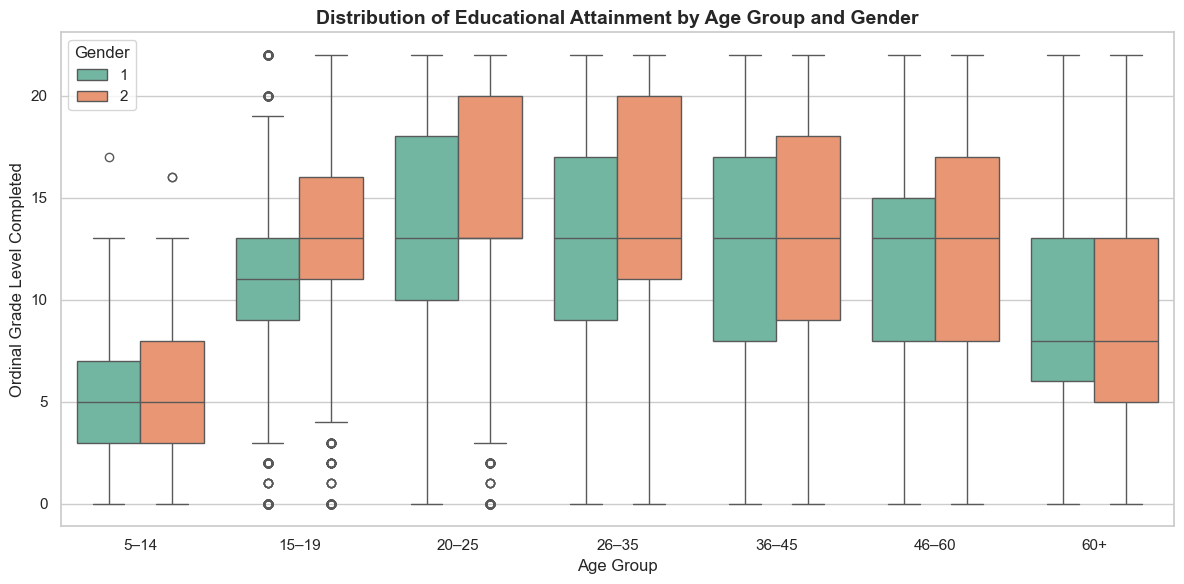

In [19]:
import seaborn as sns

age_bins = [5, 14, 19, 25, 35, 45, 60, 100]
age_labels = ['5–14', '15–19', '20–25', '26–35', '36–45', '46–60', '60+']
df_cleaned['AGE_GROUP'] = pd.cut(df_cleaned['PUFC05_AGE'], bins=age_bins, labels=age_labels)

# Set visual theme for consistency
sns.set(style="whitegrid")

# Initialize the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_cleaned,
    x='AGE_GROUP',
    y='GRADE_NUMERIC',
    hue='PUFC04_SEX',
    palette='Set2'
)

# Improve plot aesthetics
plt.title('Distribution of Educational Attainment by Age Group and Gender', fontsize=14, weight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Ordinal Grade Level Completed', fontsize=12)
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Understanding the Boxplot Code
This code creates a boxplot visualization to analyze the distribution of educational attainment across different age groups, separated by gender.

---
### Breakdown
1. Creating Age Groups - First, we categorize continuous age data into discrete age groups for better analysis:
   - age_bins: Defines the boundaries for each age group (5-14, 15-19, etc.)
   - age_labels: Provides readable labels for these groups
2. sns.boxplot() creates the actual boxplot with:
    -  data=df_cleaned: Uses our cleaned dataframe
    -  x='AGE_GROUP': Places age groups on the x-axis
    -  y='GRADE_NUMERIC': Shows educational attainment on the y-axis (likely numeric grade levels)
    -  hue='PUFC04_SEX': Separates data by gender (creates side-by-side boxes for each age group)

## Analysis

**1. Educational Attainment Progresses with Age**
- The median grade level rises steadily from the youngest age group (5–14) through early adulthood (19–25).
- Most individuals complete formal education between ages 19–35, aligning with high school, vocational, and college graduation.
- After age 35, median grade levels plateau, indicating that most people complete schooling earlier in life.

**2. Females Show Slightly Higher Educational Attainment**  
- In age groups 19–25 and 26–35, females have higher medians and narrower IQRs, suggesting more consistent educational achievement.
- In contrast, male distributions are wider, hinting at greater variation in grade levels (e.g. mix of college graduates and early dropouts).

**3. Young Age Groups Exhibit More Spread and Outliers**
- The 5–12 and 13–18 bins show broad spreads and frequent outliers — some children report high grade completion (e.g. Grade 10+), while others are just starting.
- This likely reflects mixed enrollment statuses and fast-tracked or delayed learners.

**4. Older Age Groups (60+) Have Lower Grade Medians**
- Individuals aged 60+ show lower average education levels, with many reporting elementary or no schooling. This mirrors historical access gaps in education for older generations.

**5. Outliers Signal Exceptional Paths**
- A few older adults report post-baccalaureate education — lifelong learners or late achievers.
- Conversely, some younger individuals with unusually high grades could reflect accelerated programs or data entry artifacts.

**How the Visual Supports The Research Purpose:**
This box plot directly illustrates how PUFC05_AGE (age) and PUFC04_SEX (sex) relate to PUFC07_GRADE (educational level). It captures:
- Life-stage educational trajectories
- Gender-based disparities
- Distributional nuances and variation
- Generational patterns

This sets the foundation for discovering rule-based classification of individuals based on demographic trends.

## EDA Question 2
Let's find out what the most common classifications of workers across various combinations of age and education are, and how concentrated specific job classes are within these demographic groups.

For these EDA, we will use 'PUFC05_AGE', 'PUFC07_GRADE', 'PUFC23_PCLASS', 'PUFC11_WORK', and will be stored in another dataframe.

---

### Breakdown
PUFCO5_AGE, PUFC07_GRADE, and PUFC23_PCLASS will be used to represent the observation, while PUFC11_WORK will be used to filter out those who work from those who do not work

In [20]:
df_workers = labor_df[['PUFC05_AGE', 'PUFC07_GRADE', 'PUFC23_PCLASS', 'PUFC11_WORK']].dropna()
df_workers

,PUFC05_AGE,PUFC07_GRADE,PUFC23_PCLASS,PUFC11_WORK
0,49,350,3,1
1,61,350,6,1
2,19,350,1,1
3,48,320,3,1
4,41,350,0,1
...,...,...,...,...
180857,29,350,4,1
180858,29,830,,2
180859,4,,,
180860,2,,,


------------------

In [21]:
df_workers = df_workers[(df_workers['PUFC05_AGE'] >= 15)]
df_workers

,PUFC05_AGE,PUFC07_GRADE,PUFC23_PCLASS,PUFC11_WORK
0,49,350,3,1
1,61,350,6,1
2,19,350,1,1
3,48,320,3,1
4,41,350,0,1
...,...,...,...,...
180850,34,000,3,1
180851,32,000,3,1
180857,29,350,4,1
180858,29,830,,2


### Filtering the Dataframe
The variable PUFC23_PCLASS is only answered by those whose age is at least 15. The code above filters out the dataframe from this condition

In [22]:
df_workers = df_workers[(df_workers['PUFC11_WORK'] == '1')]
df_workers

,PUFC05_AGE,PUFC07_GRADE,PUFC23_PCLASS,PUFC11_WORK
0,49,350,3,1
1,61,350,6,1
2,19,350,1,1
3,48,320,3,1
4,41,350,0,1
...,...,...,...,...
180848,25,634,2,1
180850,34,000,3,1
180851,32,000,3,1
180857,29,350,4,1


### 2nd Filter
We want to see the data only from those who work. To do this, we filter out the data again using the PUFC11_WORK value and only get those with '1' value.

In [23]:
df_workers['GRADE_NUMERIC'] = df_workers['PUFC07_GRADE'].map(grade_ordinal)

# Fill missing values with fallback logic for 500s and 600s
df_workers['GRADE_NUMERIC'] = df_cleaned['GRADE_NUMERIC'].fillna(
    df_workers['PUFC07_GRADE'].apply(assign_degree_group)
)
df_workers['GRADE_NUMERIC'] = df_workers['GRADE_NUMERIC'].astype('Int64')

df_workers['AGE_GROUP'] = pd.cut(df_workers['PUFC05_AGE'], bins=age_bins, labels=age_labels)
df_workers

C:\Users\sregi\AppData\Local\Temp\ipykernel_22268\1084228180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_workers['GRADE_NUMERIC'] = df_workers['PUFC07_GRADE'].map(grade_ordinal)
C:\Users\sregi\AppData\Local\Temp\ipykernel_22268\1084228180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_workers['GRADE_NUMERIC'] = df_cleaned['GRADE_NUMERIC'].fillna(
C:\Users\sregi\AppData\Local\Temp\ipykernel_22268\1084228180.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,PUFC05_AGE,PUFC07_GRADE,PUFC23_PCLASS,PUFC11_WORK,GRADE_NUMERIC,AGE_GROUP
0,49,350,3,1,13,46–60
1,61,350,6,1,13,60+
2,19,350,1,1,13,15–19
3,48,320,3,1,10,46–60
4,41,350,0,1,13,36–45
...,...,...,...,...,...,...
180848,25,634,2,1,22,20–25
180850,34,000,3,1,0,26–35
180851,32,000,3,1,0,26–35
180857,29,350,4,1,13,26–35


### Age Binning and Grade Numeric

We want to see later the difference in Worker Class Distribution with Age and Educational Level. To do this, we have to use the former method used above in EDA 1 to bin each observation by age and get the GRADE_NUMERIC for each.

In [24]:
print("Unique values for PUFC07_GRADE:")
print(sorted(df_workers['PUFC07_GRADE'].unique()), "\n")

print("Unique values for GRADE_NUMERIC:")
print(sorted(df_workers['GRADE_NUMERIC'].unique()), "\n")

print("Unique values for PUFC05_AGE:")
print(sorted(df_workers['PUFC05_AGE'].describe()))
print("unique ages:", sorted(df_workers['PUFC05_AGE'].dropna().unique()), "\n")

print("Unique values for PUFC23_PCLASS:")
print(sorted(df_workers['PUFC23_PCLASS'].unique()), "\n")

Unique values for PUFC07_GRADE:
['000', '010', '210', '220', '230', '240', '250', '260', '280', '310', '320', '330', '340', '350', '410', '420', '501', '514', '521', '522', '531', '532', '534', '542', '548', '552', '554', '558', '562', '564', '572', '576', '581', '584', '585', '586', '589', '601', '614', '621', '622', '631', '632', '634', '638', '642', '644', '646', '648', '652', '654', '658', '662', '664', '672', '676', '681', '684', '685', '686', '689', '810', '820', '830', '840', '900'] 

Unique values for GRADE_NUMERIC:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] 

Unique values for PUFC05_AGE:
[14.340639208446595, 15.0, 27.0, 38.0, 39.03242789453464, 49.0, 99.0, 70279.0]
unique ages: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80

### Checking the Validity

- PUFC07_GRADE is valid, and the values are expected
- GRADE_NUMERIC values are within the expected results
- PUFC05_AGE values are expected within the range of 15 to 99
- PUFC23_PCKASS values are expected and valid

**Data is Clean**

In [25]:
# Mapping worker class codes to human-readable labels
worker_class_map = {
    '0': 'Private Household',
    '1': 'Private Establishment',
    '2': 'Government',
    '3': 'Self-Employed',
    '4': 'Employer (Family Business)',
    '5': 'Paid Family Worker',
    '6': 'Unpaid Family Worker'
}

# Apply mapping to create a new column
df_workers['WORKER_CLASS_LABEL'] = df_workers['PUFC23_PCLASS'].map(worker_class_map)
df_workers

C:\Users\sregi\AppData\Local\Temp\ipykernel_22268\2299372930.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_workers['WORKER_CLASS_LABEL'] = df_workers['PUFC23_PCLASS'].map(worker_class_map)


,PUFC05_AGE,PUFC07_GRADE,PUFC23_PCLASS,PUFC11_WORK,GRADE_NUMERIC,AGE_GROUP,WORKER_CLASS_LABEL
0,49,350,3,1,13,46–60,Self-Employed
1,61,350,6,1,13,60+,Unpaid Family Worker
2,19,350,1,1,13,15–19,Private Establishment
3,48,320,3,1,10,46–60,Self-Employed
4,41,350,0,1,13,36–45,Private Household
...,...,...,...,...,...,...,...
180848,25,634,2,1,22,20–25,Government
180850,34,000,3,1,0,26–35,Self-Employed
180851,32,000,3,1,0,26–35,Self-Employed
180857,29,350,4,1,13,26–35,Employer (Family Business)


### Mapping the Observation with Worker Class

We created another map to label each observation according to the ISH Form, which tells us that: 

    '0': 'Private Household'
    '1': 'Private Establishment'
    '2': 'Government'
    '3': 'Self-Employed'
    '4': 'Employer (Family Business)'
    '5': 'Paid Family Worker'
    '6': 'Unpaid Family Worker'

In [26]:
print("Unique values for WORKER_CLASS_LABEL:")
print(sorted(df_workers['WORKER_CLASS_LABEL'].unique()), "\n")

Unique values for WORKER_CLASS_LABEL:
['Employer (Family Business)', 'Government', 'Paid Family Worker', 'Private Establishment', 'Private Household', 'Self-Employed', 'Unpaid Family Worker'] 



### Checking the Values Validity

Using the .unique() method, we can see the expected results and values for WORKER_CLASS_LABEL

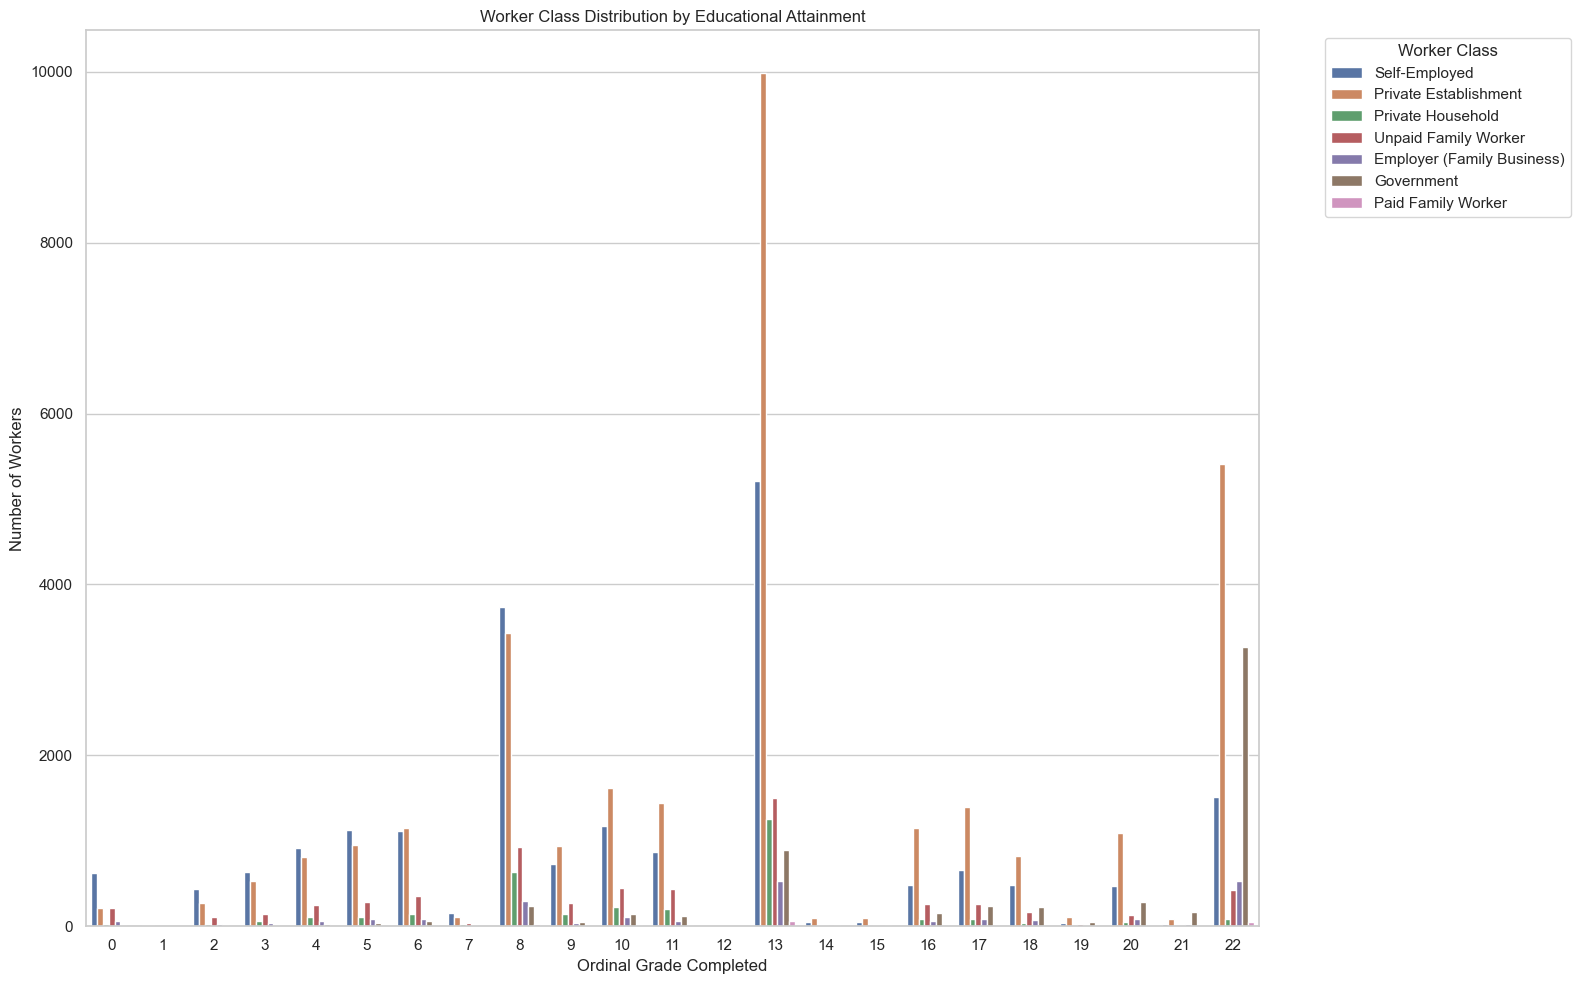

In [27]:
plt.figure(figsize=(16, 10))
sns.countplot(data=df_workers, x='GRADE_NUMERIC', hue='WORKER_CLASS_LABEL')
plt.title('Worker Class Distribution by Educational Attainment')
plt.xlabel('Ordinal Grade Completed')
plt.ylabel('Number of Workers')
plt.legend(title='Worker Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Plot Results

Afterwards, we created a plot to see the distribution of class by educational attainment and saw some insights.

---
### Analysis
1. GRADE_NUMERIC 13 is the Peak Zone
    - That’s typically a senior high school graduation.
    - It has the highest number of employed individuals overall, especially in Private Establishments and Self-Employment.
    - Suggests many enter the labor force directly after high school.
2. GRADE_NUMERIC 22 and 8 Have Secondary Peaks
    - GRADE_NUMERIC 22: High turnout again in Private Establishments and Government.
    - GRADE_NUMERIC 8: Strong in Self-Employment — possibly reflecting rural or informal labor markets where junior high completion leads to work.
3. Government and Employer Roles Cluster Higher
- More visible at higher grades— implies these positions require higher formal education or are more selective.

In [28]:
print(df_workers['WORKER_CLASS_LABEL'].value_counts(dropna=False), "\n")
print(df_workers['GRADE_NUMERIC'].value_counts(dropna=False), "\n")


WORKER_CLASS_LABEL
Private Establishment         31725
Self-Employed                 20494
Unpaid Family Worker           6253
Government                     6016
Private Household              3303
Employer (Family Business)     2273
Paid Family Worker              215
Name: count, dtype: int64 

GRADE_NUMERIC
13    19427
22    11260
8      9299
10     3721
11     3135
6      2914
17     2734
5      2585
16     2212
9      2188
4      2171
20     2105
18     1808
3      1420
0      1152
2       891
7       334
21      295
19      238
14      177
15      177
1        19
12       17
Name: count, dtype: Int64 



## Value Counts for each Grade Numeric and Worker Class

To analyze the plot even more, we have to see the numbers behind it too.

---

### Result and Analysis
1. Private Establishment holds the largest amount of employment, while Self-Employed comes in second place.
2. The highest number of GRADE_NUMERIC is Grade 13, which means that the majority only finished high school. Grade 22 comes in second place, which means many of the workers have obtained a masteral or doctorate degree.
3. The lowest number of Worker Class is Paid Family Worker which means it is highly uncommon that someone is a Paid Family Worker in the data obtained

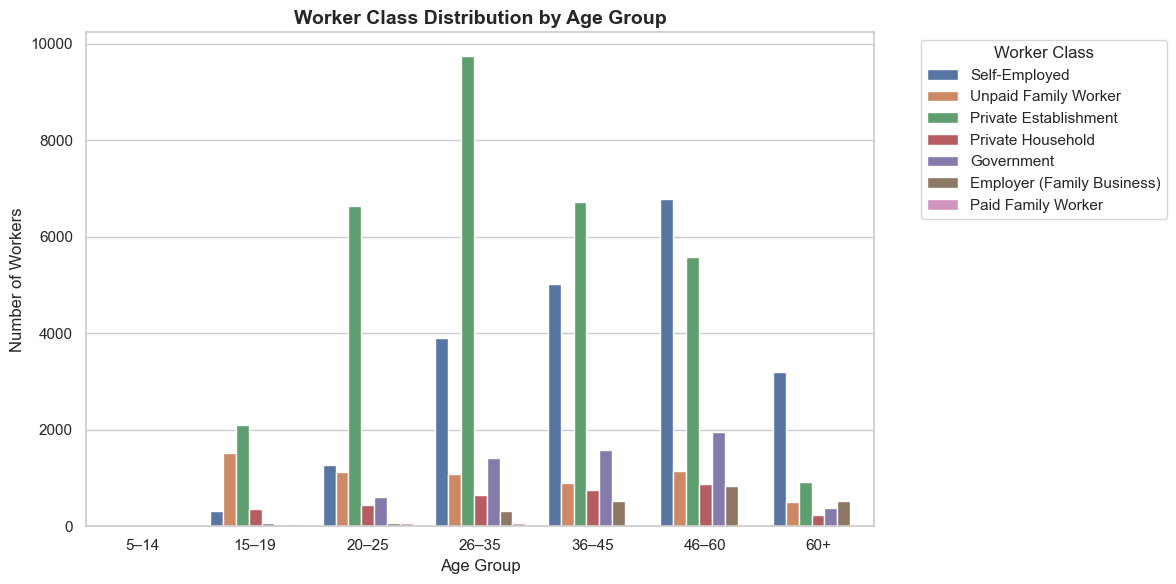

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_workers, x='AGE_GROUP', hue='WORKER_CLASS_LABEL')

plt.title('Worker Class Distribution by Age Group', fontsize=14, weight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Workers', fontsize=12)
plt.legend(title='Worker Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Plot Analysis

We created another plot that distributes the data according to age group, this time to see some insights.

Note: 5-14 is used to debug and see if the data is clean. According to the ISH form, Worker Class should not exist because we will only check if the observation works or not when they are at least 15.

---

### Results and Analysis
1. Private Establishments form a bell curve according to the plot. This might mean that most employees in private establishments leave or are not employed anymore by the establishments as they grow older.
2. Self-Employed form a bell curve skewed to the right. This might mean that as they grow older, most workers shift to being self-employed rather than work for another private job.

---

### Concepts Assumed Based on The Graph

- Private establishments are the backbone of younger employment.
- Self-employment rises with age, pointing toward independence or informal labor as people move out of structured employment.
- We can see a strong age-employment structure: formal roles dominate mid-life

In [30]:
grade_breakdown = pd.crosstab(
    df_workers['GRADE_NUMERIC'],
    df_workers['PUFC23_PCLASS'],
    normalize='index'
).round(3) * 100  # Convert to percentages

# Step 3: Optional — map to readable labels for output
grade_breakdown.rename(columns=worker_class_map, inplace=True)

# Step 4: Display or export
grade_breakdown

PUFC23_PCLASS,Private Household,Private Establishment,Government,Self-Employed,Employer (Family Business),Paid Family Worker,Unpaid Family Worker
GRADE_NUMERIC,,,,,,,
0,2.7,18.9,0.8,53.9,5.4,0.0,18.3
1,5.3,47.4,0.0,42.1,5.3,0.0,0.0
2,3.4,30.8,1.7,48.5,3.5,0.0,12.2
3,4.0,37.0,1.1,44.4,3.0,0.2,10.2
4,4.9,37.4,1.4,42.3,2.6,0.2,11.1
5,4.0,36.7,1.5,43.5,3.1,0.2,11.0
6,4.9,39.5,2.2,38.3,2.8,0.3,12.0
7,6.9,32.0,2.1,44.6,3.3,0.6,10.5
8,6.8,37.0,2.6,40.2,3.2,0.2,10.0


## Crosstabbing

Using the .crosstab() method, we can see the distribution of GRADE_NUMERIC for each Worker Class

---

### Results
1. Private Establishments Dominate the Mid-Education Labor Pool
- Consistently the most frequent worker class for Grades 9 through 15.
- Suggests that formal employment in corporate or service sectors peaks after junior high to senior high completion.
- This is mirrored in the age chart, where 26–35 is the prime working age, overlapping with those educational levels.
  
2. Unpaid Family Work Concentrates at Educational Extremes
- From the percentage table, Grade 0 (no schooling) starts at 18.3% unpaid workers, peaking again at Grade 12 (23.5%).
- However, it drops sharply for Grades 13–20, implying that formal education helps shift workers away from unpaid roles.
- Also more common in older and younger age groups, reinforcing its role in rural, informal, or transitional labor.
  
3. Government Roles Require Higher Educational Attainment
- Rare in lower grades but spikes from Grade 14 upward, topping 55.3% at Grade 21 (post-baccalaureate).
- This emphasizes the need for formal credentials for public sector work.
  

-----------------

## EDA Question 3
Lets' find out if there's a significant relationship between sex and the class of worker, and does educational attainment mediate this relationship?

To do this we will have to use 'PUFC05_AGE', 'PUFC07_GRADE', 'PUFC23_PCLASS', 'PUFC04_SEX', 'PUFC11_WORK' to represent each observation

---

### Reason
**PUFC05_AGE** - We should only get the answers from those who are atleast 15 yrs old
**PUFC07_GRADE** - We should label each observation by educational attainment
**PUFC23_PCLASS** - We must see the class of each worker in the dataframe
**PUFC11_WORK** - We should only get those with '1' values or those who work

In [31]:
df_edu_sex_class = labor_df[['PUFC05_AGE', 'PUFC07_GRADE', 'PUFC23_PCLASS', 'PUFC04_SEX', 'PUFC11_WORK']]

df_edu_sex_class = df_edu_sex_class[
    (df_edu_sex_class['PUFC05_AGE'] >= 15) &
    (df_edu_sex_class['PUFC11_WORK'] == '1')
]

df_edu_sex_class

,PUFC05_AGE,PUFC07_GRADE,PUFC23_PCLASS,PUFC04_SEX,PUFC11_WORK
0,49,350,3,1,1
1,61,350,6,2,1
2,19,350,1,1,1
3,48,320,3,1,1
4,41,350,0,2,1
...,...,...,...,...,...
180848,25,634,2,1,1
180850,34,000,3,1,1
180851,32,000,3,2,1
180857,29,350,4,1,1


In [32]:
df_edu_sex_class['WORKER_CLASS_LABEL'] = df_edu_sex_class['PUFC23_PCLASS'].map(worker_class_map)
df_edu_sex_class['GRADE_NUMERIC'] = df_edu_sex_class['PUFC07_GRADE'].map(grade_ordinal)
df_edu_sex_class['GRADE_NUMERIC'] = df_edu_sex_class['GRADE_NUMERIC'].fillna(
    df_edu_sex_class['PUFC07_GRADE'].apply(assign_degree_group)
)
df_edu_sex_class['GRADE_NUMERIC'] = df_edu_sex_class['GRADE_NUMERIC'].astype('Int64')
df_edu_sex_class

,PUFC05_AGE,PUFC07_GRADE,PUFC23_PCLASS,PUFC04_SEX,PUFC11_WORK,WORKER_CLASS_LABEL,GRADE_NUMERIC
0,49,350,3,1,1,Self-Employed,13
1,61,350,6,2,1,Unpaid Family Worker,13
2,19,350,1,1,1,Private Establishment,13
3,48,320,3,1,1,Self-Employed,10
4,41,350,0,2,1,Private Household,13
...,...,...,...,...,...,...,...
180848,25,634,2,1,1,Government,22
180850,34,000,3,1,1,Self-Employed,0
180851,32,000,3,2,1,Self-Employed,0
180857,29,350,4,1,1,Employer (Family Business),13


### Labeling 

Using the method from earlier method, we label each worker class and educational attainment

In [33]:
print("Unique values for PUFC05_AGE:")
print(sorted(df_edu_sex_class['PUFC05_AGE'].unique()), "\n")

print("Unique values for PUFC07_GRADE:")
print(sorted(df_edu_sex_class['PUFC07_GRADE'].unique()), "\n")

print("Unique values for PUFC23_PCLASS:")
print(sorted(df_edu_sex_class['PUFC23_PCLASS'].unique()), "\n")

print("Unique values for PUFC04_SEX:")
print(df_edu_sex_class['PUFC04_SEX'].unique(), "\n")

print("Unique values for PUFC11_WORK:")
print(df_edu_sex_class['PUFC11_WORK'].unique(), "\n")

print("Unique values for WORKER_CLASS_LABEL:")
print(df_edu_sex_class['WORKER_CLASS_LABEL'].unique(), "\n")

print("Unique values for GRADE_NUMERIC:")
print(sorted(df_edu_sex_class['GRADE_NUMERIC'].unique()), "\n")

Unique values for PUFC05_AGE:
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 99] 

Unique values for PUFC07_GRADE:
['000', '010', '210', '220', '230', '240', '250', '260', '280', '310', '320', '330', '340', '350', '410', '420', '501', '514', '521', '522', '531', '532', '534', '542', '548', '552', '554', '558', '562', '564', '572', '576', '581', '584', '585', '586', '589', '601', '614', '621', '622', '631', '632', '634', '638', '642', '644', '646', '648', '652', '654', '658', '662', '664', '672', '676', '681', '684', '685', '686', '689', '810', '820', '830', '840', '900'] 

Unique values for PUFC23_PCLASS:
['0', '1', '2', '3', '4', '5', '6'] 

Unique values for PUFC04_SEX:
[1 2] 

Unique values for PUFC11_WORK:
['

## Checking the dataframe validity

- PUFC05_AGE is valid and only contains values from 15 to 99
- PUFC07_GRADE values are within the range and make sense
- PUFC23_PCLASS contains 0-6, which makes sense according to the ISH Form
- PUFC04_SEX is clean and only contains two values representing the sex
- PUFC11_WORK values contain 1, which means that we filtered and only collected those who work
- WORKER_CLASS_LABEL means that we labeled each PUFC23_PCLASS instead of numbers from 0-6
- GRADE_NUMERIC is valid and ordinally labeled the educational attainment of each observation

---

### Conclusion
**The Data is Clean**

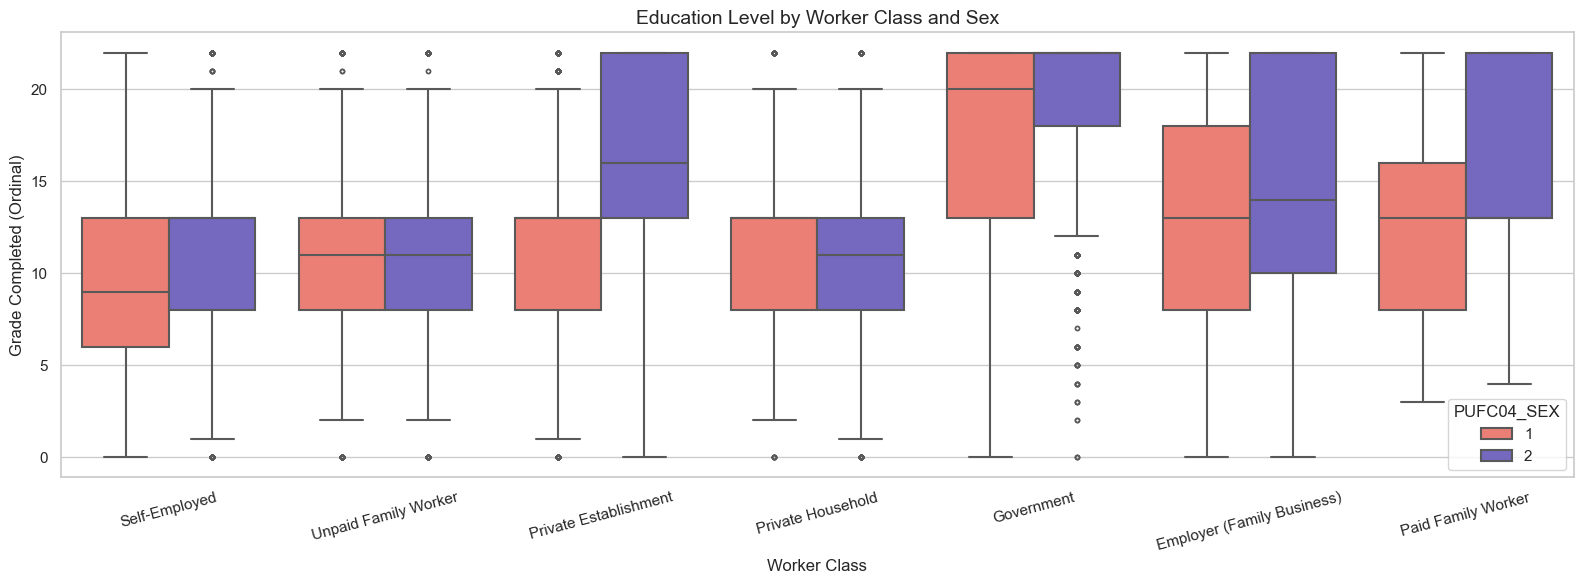

In [34]:
plt.figure(figsize=(16, 6))
sns.boxplot(
    data=df_edu_sex_class,
    x='WORKER_CLASS_LABEL',
    y='GRADE_NUMERIC',
    hue='PUFC04_SEX',
    palette={1: '#FF6F61', 2: '#6A5ACD'},  # Custom colors for Male/Female
    linewidth=1.5,                         # Thicker box lines
    fliersize=3                            # Optional: smaller outlier dots
)

plt.title('Education Level by Worker Class and Sex', fontsize=14)
plt.xlabel('Worker Class')
plt.ylabel('Grade Completed (Ordinal)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Plot Analysis

The box plot shows the distribution of educational attainment (grade levels completed) across different employment types, separated by gender.

---
### Key Observations (Based on Structure)
1. Education Hierarchy Among Worker Classes:
   - Expected pattern from highest to lowest education:
     - Government employees (typically highest requirements)
     and so on
2. Gender Disparities:
    - For each worker class, two boxes/violins show gender comparison
    - According to the plot, females have higher educational attainment in Private Establishment and Government.

## Rule Mining

In [35]:
df_rule_mining = labor_df[['PUFC04_SEX', 'PUFC05_AGE', 'PUFC07_GRADE', 'PUFC11_WORK', 'PUFC23_PCLASS']]
df_rule_mining = df_rule_mining[df_rule_mining['PUFC05_AGE'] >= 15]
df_rule_mining = df_rule_mining[df_rule_mining['PUFC11_WORK'] == '1']


df_rule_mining['GRADE_NUMERIC'] = df_rule_mining['PUFC07_GRADE'].map(grade_ordinal)
df_rule_mining['GRADE_NUMERIC'] = df_rule_mining['GRADE_NUMERIC'].fillna(
    df_rule_mining['PUFC07_GRADE'].apply(assign_degree_group)
)
df_rule_mining['GRADE_NUMERIC'] = df_rule_mining['GRADE_NUMERIC'].astype('Int64')

df_rule_mining['WORKER_CLASS_LABEL'] = df_rule_mining['PUFC23_PCLASS'].map(worker_class_map)
df_rule_mining['AGE_GROUP'] = pd.cut(df_rule_mining['PUFC05_AGE'], bins=age_bins, labels=age_labels)
df_rule_mining

,PUFC04_SEX,PUFC05_AGE,PUFC07_GRADE,PUFC11_WORK,PUFC23_PCLASS,GRADE_NUMERIC,WORKER_CLASS_LABEL,AGE_GROUP
0,1,49,350,1,3,13,Self-Employed,46–60
1,2,61,350,1,6,13,Unpaid Family Worker,60+
2,1,19,350,1,1,13,Private Establishment,15–19
3,1,48,320,1,3,10,Self-Employed,46–60
4,2,41,350,1,0,13,Private Household,36–45
...,...,...,...,...,...,...,...,...
180848,1,25,634,1,2,22,Government,20–25
180850,1,34,000,1,3,0,Self-Employed,26–35
180851,2,32,000,1,3,0,Self-Employed,26–35
180857,1,29,350,1,4,13,Employer (Family Business),26–35


This analysis leverages rule mining techniques to uncover associations among key demographic and occupational variables: sex, educational attainment, worker class, and age group. By examining patterns in these categorical attributes, we aim to identify rules that reveal how these factors interact and co-occur within the dataset. 

For this to work, we will use 'PUFC04_SEX', 'PUFC05_AGE', 'PUFC07_GRADE', 'PUFC11_WORK', 'PUFC23_PCLASS' to represent each observation and label them by Educational Level Attained and Worker Class, and bin them by age group.

In [36]:
print("Unique values for PUFC04_SEX:")
print(df_rule_mining['PUFC04_SEX'].unique(), "\n")

print("Unique values for WORKER_CLASS_LABEL:")
print(df_rule_mining['WORKER_CLASS_LABEL'].unique(), "\n")

print("Unique values for PUFC05_AGE:")
print(sorted(df_rule_mining['PUFC05_AGE'].unique()), "\n")

print("Unique values for PUFC07_GRADE:")
print(sorted(df_rule_mining['PUFC07_GRADE'].unique()), "\n")

print("Unique values for PUFC11_WORK:")
print(df_rule_mining['PUFC11_WORK'].unique(), "\n")

print("Unique values for PUFC23_PCLASS:")
print(sorted(df_rule_mining['PUFC23_PCLASS'].unique()), "\n")

print("Unique values for GRADE_NUMERIC:")
print(sorted(df_rule_mining['GRADE_NUMERIC'].unique()), "\n")

print("Unique values for AGE_GROUP:")
print(sorted(df_rule_mining['AGE_GROUP'].unique()), "\n")


Unique values for PUFC04_SEX:
[1 2] 

Unique values for WORKER_CLASS_LABEL:
['Self-Employed' 'Unpaid Family Worker' 'Private Establishment'
 'Private Household' 'Government' 'Employer (Family Business)'
 'Paid Family Worker'] 

Unique values for PUFC05_AGE:
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 99] 

Unique values for PUFC07_GRADE:
['000', '010', '210', '220', '230', '240', '250', '260', '280', '310', '320', '330', '340', '350', '410', '420', '501', '514', '521', '522', '531', '532', '534', '542', '548', '552', '554', '558', '562', '564', '572', '576', '581', '584', '585', '586', '589', '601', '614', '621', '622', '631', '632', '634', '638', '642', '644', '646', '648', '652', '654', '658', '662', '664', 

## Checking the Validity of each variable

- PUFC04_SEX is valid and contains two values
- WORKER_CLASS_LABEL values are expected
- PUFC05_AGE contains values from 15-99, which is expected
- PUFC07_GRADE values are in the range expected
- We filtered out those who work in the dataframe using PUFC11_WORK == '1'
- PUFC23_PCLASS values are expected
- Each observation is labelled ordinally
- AGE_GROUP shows that we have successfully binned by age

---

### Conclusion

**Data is cleaned and we can proceed with creating the rule mining dataframe**

In [37]:
binary_df = pd.DataFrame(columns=['MALE'])
binary_df["MALE"] = (df_rule_mining["PUFC04_SEX"] == 1).astype(int)
binary_df["FEMALE"] = (df_rule_mining["PUFC04_SEX"] == 2).astype(int)

for grade in range(23):
    binary_df[f'GRADE_{grade}'] = (df_rule_mining['GRADE_NUMERIC'] == grade).astype(int)

# 👥 One-hot encode age groups
age_dummies = pd.get_dummies(df_rule_mining['AGE_GROUP'], prefix='AGE').astype(int)
binary_df = pd.concat([binary_df, age_dummies], axis=1)

# 🧑‍💼 One-hot encode worker classes
class_dummies = pd.get_dummies(df_rule_mining['WORKER_CLASS_LABEL'], prefix='CLASS').astype(int)
binary_df = pd.concat([binary_df, class_dummies], axis=1)


## Creating a Binary Dataframe
To do rule mining, we have to create a dataframe that only contains variables that represent a characteristic that an observation has.

If they contain it, it has to have 1 on that characteristic and 0 if it does not have.

---

### Code Breakdown

This code is performing data preprocessing to convert categorical variables into a binary (0/1) format. Let's break it down step by step:

To start with we create a dataframe named binary_df with MALE column.
PUFC04_SEX is a column in the original DataFrame (df_rule_mining) representing gender (likely 1 = Male, 2 = Female).

---

**MALE column:**
1 if PUFC04_SEX == 1 (Male)
0 otherwise.

---
**FEMALE column:**

1 if PUFC04_SEX == 2 (Female)
0 otherwise.

---

**GRADE_NUMERIC** is a column representing education levels (from 0 to 22, which is ordinally sorted).
Creates 23 new binary columns (GRADE_0, GRADE_1, ..., GRADE_22) where:
GRADE_X = 1 if the person completed grade X.
GRADE_X = 0 otherwise.
Why? This "one-hot encodes" education levels so algorithms can treat them as separate binary features.

---

**AGE_GROUP** is a categorical column (e.g., 5-14, 15-19, etc.).
pd.get_dummies() converts each age group into a binary column (e.g., AGE_5-14, AGE_15-19, etc.).

---

**WORKER_CLASS_LABEL** is a categorical column (e.g., Self-Employed, Government, etc.).
pd.get_dummies() creates binary columns for each worker class (e.g., CLASS_Self-Employed, CLASS_Government, etc.).
Why? Similar to age groups, worker class categories are converted into binary features.

In [38]:
binary_df

,MALE,FEMALE,GRADE_0,GRADE_1,GRADE_2,GRADE_3,GRADE_4,GRADE_5,GRADE_6,GRADE_7,...,AGE_36–45,AGE_46–60,AGE_60+,CLASS_Employer (Family Business),CLASS_Government,CLASS_Paid Family Worker,CLASS_Private Establishment,CLASS_Private Household,CLASS_Self-Employed,CLASS_Unpaid Family Worker
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
180850,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
180851,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
180857,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Seeing the result we can finally start to use rule mining for analysis

In [39]:
binary_df_dupe = binary_df[['MALE', 'FEMALE', 'GRADE_21', 'CLASS_Government']]
binary_df_dupe

,MALE,FEMALE,GRADE_21,CLASS_Government
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
180848,1,0,0,1
180850,1,0,0,0
180851,0,1,0,0
180857,1,0,0,0


Dupe for the dataframe which we will use to check Class_Government because the original class contains too many variables and we cannot see the results clearly for those with many values

In [40]:
binary_df.describe()

,MALE,FEMALE,GRADE_0,GRADE_1,GRADE_2,GRADE_3,GRADE_4,GRADE_5,GRADE_6,GRADE_7,...,AGE_36–45,AGE_46–60,AGE_60+,CLASS_Employer (Family Business),CLASS_Government,CLASS_Paid Family Worker,CLASS_Private Establishment,CLASS_Private Household,CLASS_Self-Employed,CLASS_Unpaid Family Worker
count,70279.000000,70279.000000,70279.000000,70279.00000,70279.000000,70279.000000,70279.000000,70279.000000,70279.000000,70279.000000,...,70279.000000,70279.000000,70279.000000,70279.000000,70279.000000,70279.000000,70279.000000,70279.000000,70279.000000,70279.000000
mean,0.616984,0.383016,0.016392,0.00027,0.012678,0.020205,0.030891,0.036782,0.041463,0.004752,...,0.220649,0.244810,0.082030,0.032343,0.085602,0.003059,0.451415,0.046998,0.291609,0.088974
std,0.486126,0.486126,0.126978,0.01644,0.111882,0.140703,0.173024,0.188227,0.199361,0.068775,...,0.414687,0.429978,0.274413,0.176909,0.279777,0.055226,0.497637,0.211637,0.454507,0.284708
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking if the Data is clean

Looking at the dataframe description, we can confidently say that it only contains 0 and 1, and we can start rule mining.

In [41]:
from rule_miner import RuleMiner

### Rule Mining Object

We will use the rule_miner.py file from the former activity

In [42]:
rule_miner1 = RuleMiner(support_t = 2000, confidence_t = 0.7)


association_rules = rule_miner1.get_association_rules(binary_df)

We created an instance of a RuleMiner that has 2000 support threshold and 70% confidence treshhold

### Why These Thresholds Matter

**Support threshold (2000)**:
- Ensures extracted rules are based on substantial data, improving **statistical reliability**.
- Filters out noise from infrequent patterns that may not generalize well across the dataset.

**Confidence threshold (70%)**:
- Sets a high bar for rule precision: only rules where the consequent holds true 70% of the time given the antecedent are retained.
- Enhances **actionability** of the rules, particularly in recommendation, classification, or decision systems.

### Dataframe Display Configuration
These settings above ensure the entire association_rules DataFrame is visible without truncation.

In [43]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  
association_rules

,Antecedent,Consequent,Confidence
0,CLASS_Private Household,FEMALE,0.837
3,"CLASS_Private Establishment, GRADE_8",MALE,0.834
8,"CLASS_Private Establishment, GRADE_13, AGE_26–35",MALE,0.769
5,"CLASS_Private Establishment, AGE_46–60",MALE,0.757
7,"CLASS_Private Establishment, AGE_36–45",MALE,0.756
4,"CLASS_Private Establishment, GRADE_13",MALE,0.755
6,"CLASS_Private Establishment, AGE_26–35",MALE,0.729
1,CLASS_Private Establishment,MALE,0.728
2,GRADE_6,MALE,0.726


### Result and Analysis

1. Rule 1: Private Household Workers are Predominantly Female
   This rule indicates that 83.7% of private household workers (e.g., domestic helpers, cleaners) are female.
   Possible Implications:
    - Domestic work is highly feminized, likely due to traditional gender roles associating women with caregiving and housekeeping.
2. Rule 2: Male Workers Dominate Private Establishments
    This rule indicates that72.8% of privateestablishments workers (e.g., corporate jobs) are male.
   Possible Implications:
    - Employers may prefer males for entry-level private sector jobs, even when females have equivalent education.

The code snippet shows the application of association rule mining to analyze relationships between gender, education level, and government employment.

- Sets minimum support threshold to 100 (rules must appear at least 100 times)
- Sets minimum confidence threshold to 0.1 (rules must be correct at least 10% of the time)

### Reason
The number of workers in government sectors surveyed is low, and I want to see the possible rules that can be produced with 10% confidence.

In [44]:
rule_miner2 = RuleMiner(support_t = 100, confidence_t = 0.1)
association_rules = rule_miner2.get_association_rules(binary_df_dupe)
association_rules

,Antecedent,Consequent,Confidence
7,"CLASS_Government, GRADE_21",FEMALE,0.706
8,"GRADE_21, FEMALE",CLASS_Government,0.657
2,GRADE_21,FEMALE,0.593
3,GRADE_21,CLASS_Government,0.553
0,CLASS_Government,FEMALE,0.522
5,CLASS_Government,MALE,0.478
4,GRADE_21,MALE,0.407
6,GRADE_21,"CLASS_Government, FEMALE",0.390
1,FEMALE,CLASS_Government,0.117


### Result and Analysis
1. Highly Educated Women in Government
   - Interpretation: Among people with Grade 21 education working in government, 70.6% are female
   - Implication: Advanced education in the government sector is female-dominated
2. Government Employment Patterns
   - CLASS_Government → FEMALE (52.2%)
   - CLASS_Government → MALE (47.8%)

---

### Implications

1. Gender Representation in Highly Educated Government Workforce
Among government workers with post-baccalaureate education (Grade 21), 70.6% are female, while the overall government workforce is 52.2% female.
Implication: Women with advanced degrees appear to be notably represented in government roles, suggesting that government may attract or retain more highly educated women than other sectors.

2. Differences in Entry Patterns by Gender and Education Level
The rules indicate that highly educated women have a 65.7% likelihood of being in government service. No comparably strong rule exists for highly educated men.
Implication: This pattern may reflect sectoral dynamics, such as the government offering more appealing or accessible pathways for educated women—though further data would be needed to validate whether this stems from hiring preferences, sectoral compensation, or other factors.

### Statistical Inference

Using insights and knowledge from the EDAs and Rule Mining, we can answer some questions to answer the research questions, which are:

What are the underlying demographic and educational patterns that influence the classification of workers in the labor force, and how do sex, age, and educational attainment interact to shape occupational categories in the dataset?


To do this, we can use:

1. Chi-square for Demographic Influence
   - Justification: Rule Mining suggested sex imbalances in certain work classes; Chi-square quantifies if this is significant."
   - Purpose: Assess if sex distribution significantly varies across work classes.
   - H0 (Null Hypothesis): Sex and work class are independent; the distribution of males and females is the same across all work classes.
   - HA (Alternative Hypothesis):
Sex and work class are not independent; the distribution of males and females differs significantly across work classes.
2. ANOVA for Age/Grade Patterns
   - Justification: EDA linked age ranges to specific grade classes; ANOVA tests if the mean age differs across grade classes.
   - Purpose: Test whether age differs for each grade class
   - H0 (Null Hypothesis): There is no significant difference in the mean age across different grade levels.
   - HA (Alternative Hypothesis): At least one grade level group has a significantly different mean age compared to others.
3. Chi-square for Educational Attainment Influence
   - Justification: EDA shows that each work class (PUFC23_PCLASS) has a distinct distribution of educational attainment levels.
   - Purpose: Evaluate if educational attainment levels are distributed differently across different work classes
   - H0 (Null Hypothesis): Educational attainment and work class are independent; grade levels are equally distributed across work classes.
   - HA (Alternative Hypothesis): Educational attainment and work class are not independent; grade level distributions differ significantly across work classes.
4. T-test: Age Differences Between Degree and Non-Degree Holders
   - Justification: EDA1 revealed potential age differences based on degree completion. A t-test isolates whether degree holders enter the labor force at a different age.
   - Purpose: Compare the mean age between individuals who completed formal degrees (Bachelor’s, Post-Baccalaureate, Graduate studies) and those who did not, to identify patterns in workforce entry tied to education level.
   - H0 (Null Hypothesis): There is no significant difference in mean age between degree holders and non-degree holders.
   - HA (Alternative Hypothesis): There is a significant difference in mean age between degree holders and non-degree holders.


### Dataframe Display Configuration and 

The maximum rows displayed is returned to 10 for optimization.

---

### scipy.stats imports used
1. **chi2_contingency**
   - This imports the chi2_contingency() function from the scipy.stats module, which is used to test whether two categorical variables are independent of each other.
2. **f_oneway**
   - This function performs a one-way ANOVA (Analysis of Variance), used to test whether three or more independent groups have the same population mean.
3. **ttest_ind**
   - This function compares the means of two independent groups to see if they’re statistically different from each other.

In [45]:
pd.set_option('display.max_rows', 10) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  

In [46]:
from scipy.stats import chi2_contingency
df_inf1 = labor_df[['PUFC04_SEX', 'PUFC05_AGE', 'PUFC07_GRADE', 'PUFC11_WORK', 'PUFC23_PCLASS']].dropna()
df_inf1 = df_inf1[df_inf1['PUFC05_AGE'] >= 15]
df_inf1 = df_inf1[df_inf1['PUFC11_WORK'] == '1']

# Contingency table for sex vs work class
contingency_sex = pd.crosstab(df_inf1['PUFC04_SEX'], df_inf1['PUFC23_PCLASS'])

# Run Chi-square test
chi2_sex, p_sex, dof_sex, expected_sex = chi2_contingency(contingency_sex)

print(f"Chi-square Statistic (Sex vs Work Class): {chi2_sex:.2f}")
print(f"Degrees of Freedom: {dof_sex}")
print(f"P-value: {p_sex:.5f}")

Chi-square Statistic (Sex vs Work Class): 6408.65
Degrees of Freedom: 6
P-value: 0.00000


### Statistical Inference 1

Chi-square for Demographic Influence 

To assess whether sex and work class are statistically associated, we conducted a Chi-square test of independence using labor force participants who work and are aged 15 and above.

---

### Results:
- Chi-square Statistic: 6408.65
- Degrees of Freedom: 6
- P-value: < 0.00001 (Highly significant)
- Rejects Null Hypothesis
  
Interpretation:
This result indicates a statistically significant relationship between a person's sex and their classification into occupational categories. The null hypothesis of independence is rejected, aligning with earlier rule mining insights suggesting gender imbalance across work classes.



In [48]:
from scipy.stats import f_oneway

# Filter active labor force aged 15+
df_anova = labor_df[['PUFC07_GRADE', 'PUFC05_AGE', 'PUFC11_WORK']].dropna()
df_anova = df_anova[(df_anova['PUFC05_AGE'] >= 15) & (df_anova['PUFC11_WORK'] == '1')]

# Group ages by grade category
grouped = [df_anova[df_anova['PUFC07_GRADE'] == g]['PUFC05_AGE'] for g in df_anova['PUFC07_GRADE'].unique()]

# Run ANOVA
f_stat, p_val = f_oneway(*grouped)

# Output results
print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.5f}")

ANOVA F-statistic: 89.76
P-value: 0.00000


### Statistical Inference 2

To determine whether average age significantly differs among groups defined by grade level (PUFCO7_GRADE), we have to do ANOVA testing to validate the demographic patterns observed during EDA.

---

### What ANOVA has to do with this: 

We're trying to determine whether the average age significantly differs across groups categorized by grade level. Using ANOVA, we can compare - mean age across multiple groups (grade levels).

---

### Results
- F-statistic: 89.76
- P-value: < 0.00001
- Rejects Null Hypothesis

Interpretation:
The test yields a highly significant result, meaning that age distributions are not equal across grade classifications. This reinforces the insight that education level is linked to distinct age groups within the labor force.

In [49]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_workers['GRADE_NUMERIC'], df_workers['PUFC23_PCLASS'])

# Step 3: Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.5f}")

Chi-square Statistic: 13060.25
Degrees of Freedom: 132
P-value: 0.00000


### Statistical Inference 3

To see if educational attainment levels are distributed differently across work classes, we will have to use the Chi-square again.

---

### What It Justifies

To statistically justify the EDA observation that each work class has its own pattern of educational attainment. The goal is to formally test whether these patterns are real or just random variations.

---

### Results
- Chi-square statistic: 13060.25
- Degrees of freedom: 132
- P-value: 0.00000
- Rejects Null Hypothesis

Interpretation:
Work class and educational attainment are statistically associated.
This isn’t just a coincidence. It's a pattern embedded in the labor force data.


### Data Processing for Inference 4

To use the t-test, we have to separate the 2 groups (degree and non-degree holders) in the data. So, we have to map and assign a degree group for each observation. 

Note that the degree holders are 20 (bachelor's degree holders), 21 (post-baccalaureate), and 22 (master's/doctoral degree holders) 

In [50]:
    from scipy.stats import ttest_ind

df_inf4 = labor_df[['PUFC04_SEX', 'PUFC05_AGE', 'PUFC07_GRADE', 'PUFC11_WORK', 'PUFC23_PCLASS']]
df_inf4 = df_inf4[(df_inf4['PUFC05_AGE'] >= 15) & (df_inf4['PUFC11_WORK'] == '1')]
df_inf4['DEGREE_GROUP'] = df_inf4['PUFC07_GRADE'].map(grade_ordinal)
df_inf4['DEGREE_GROUP'] = df_inf4['PUFC07_GRADE'].apply(assign_degree_group)

df_inf4['DEGREE_GROUP'] = df_inf4['PUFC07_GRADE'].map(grade_ordinal)
df_inf4['DEGREE_GROUP'] = df_inf4['DEGREE_GROUP'].fillna(
    df_inf4['PUFC07_GRADE'].apply(assign_degree_group)
)
df_inf4['DEGREE_GROUP'] = df_inf4['DEGREE_GROUP'].astype('Int64')
print(sorted(df_inf4['DEGREE_GROUP'].unique()))
df_inf4

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


,PUFC04_SEX,PUFC05_AGE,PUFC07_GRADE,PUFC11_WORK,PUFC23_PCLASS,DEGREE_GROUP
0,1,49,350,1,3,13
1,2,61,350,1,6,13
2,1,19,350,1,1,13
3,1,48,320,1,3,10
4,2,41,350,1,0,13
...,...,...,...,...,...,...
180848,1,25,634,1,2,22
180850,1,34,000,1,3,0
180851,2,32,000,1,3,0
180857,1,29,350,1,4,13


### Separate the Two Categories
Create two new dataframes that include and exclude, respectively, the observations with 'DEGREE_GROUP' values of 20, 21, and 22.
After doing this, we can use ttest_ind

In [51]:
from scipy.stats import ttest_ind

# Group 1: Degree holders
age_degree = df_inf4[df_inf4['DEGREE_GROUP'].isin([20, 21, 22])]['PUFC05_AGE']

# Group 2: Non-degree holders
age_nodegree = df_inf4[~df_inf4['DEGREE_GROUP'].isin([20, 21, 22])]['PUFC05_AGE']

# Perform t-test
t_stat, p_val = ttest_ind(age_degree, age_nodegree, equal_var=False)

# Output results
print("T-test: Age Differences Between Degree and Non-Degree Holders")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.5f}")

T-test: Age Differences Between Degree and Non-Degree Holders
T-statistic: -13.41
P-value: 0.00000


### Statistical Inference 4

This test is used to determine whether individuals who completed a formal degree (Bachelor’s, Post-Baccalaureate, Graduate programs) tend to differ in age compared to those who didn’t.

---

### What it Justifies

The t-test helps us quantify whether the age difference between degree holders and non-degree holders is statistically significant. It moves our insight from “we noticed a difference during EDA” to “this difference is unlikely due to random variation.”

---

### Result

- T-statistic of -13.41 indicates a substantial difference in mean age.
- P-value near zero strongly suggests this difference is statistically significant — i.e., very unlikely due to chance.
- Rejects Null Hypothesis

Interpretation:
- Degree holders are likely younger than non-degree holders, given the negative t-statistic.
- This proves EDA1 where older Age Groups (60+) Have Lower Grade Medians

## Insights and Conclusion

Using all of the information and data collected from the csv, we can now answer our original research question.

**Research Question:**
What are the underlying demographic and educational patterns that influence the classification of workers in the labor force, and how do sex, age, and educational attainment interact to shape occupational categories in the dataset?

---

### Overview

To answer this question, the project followed a structured analytical path:
1. Exploratory Data Analysis (EDA) to visualize trends in age, sex, education (grade levels), and work class.
2. Association Rule Mining to detect patterns in demographic and occupational groups.
3. Statistical Inference (Chi-square tests, ANOVA, t-tests) to confirm the validity and significance of these observed relationships.

---

### Key Findings

1. Education Is Strongly Age-Dependent
   - Median educational attainment rises with age from childhood to young adulthood (peaking around age 25–35), after which it plateaus
   - Older individuals (60+) exhibit significantly lower education levels, reflecting historical access gaps. T-test Result: T-statistic = -13.41 shows that degree holders are likely younger than non-degree holders also supports this.
   - ANOVA Test Result: F-statistic = 89.76, p < 0.00001 → age and education level are significantly associated.
2. Work Classification Is Structured by Educational Attainment
   - Grade 13 is the most common attainment among employed individuals — a major entry point into the labor market in 2016.
   - Private Establishments dominate among those with mid-level education (Grades 9–15), while:
     - Self-employment is prevalent among those with lower education (Grade 8)
     - Government jobs require higher education (Grades 18–22+)
   - Chi-square Result (Education vs. Work Class): chi-square statistic = 13060.25, df = 132, p < 0.00001 → education level significantly influences work class.
3. Sex Influences Occupational Category and Education
   - Females show higher educational attainment than males, especially between ages 19–35.
   - Private Household Workers are 83.7% female — a reflection of gendered labor roles.
   - Government employment is more evenly split (52.2% female), but highly educated government employees (Grade 21) are 70.6% female.
   -  Chi-square Result (Sex vs. Work Class): chi-square statistic = 6408.65, df = 6, p < 0.00001 → gender and occupation class are significantly related.
4. Age Influences Employment Type
   - Private Establishment employment peaks at working ages (25–40), then declines with age — forming a bell curve.
   - Self-employment increases steadily with age — peaking in later adulthood — suggesting a shift toward informal or independent work.
   - T-test comparing age of degree vs. non-degree holders: t = -13.41, p ≈ 0 → Degree holders tend to be younger.
5. Rule-Based Patterns Capture Complex Interactions
   - Rule 1: Private household work is overwhelmingly female (83.7%).
   - Rule 2: Private establishments are male-dominated (72.8%), despite females often having equivalent or higher education.
   - Rule 3: Highly educated women are overrepresented in government roles (70.6% at Grade 21).
These rules reveal intersectional dynamics: even with high educational attainment, women are funneled into different sectors than men.

---

### Conclusion

The classification of labor force participants is not random, but instead reflects predictable demographic and educational patterns:
- Educational attainment is the strongest predictor of work class: formal roles (government, private establishments) demand higher education, while informal roles (self-employment, household work) are more flexible.

- Sex and age intersect with education to influence occupational outcomes. For example:

   - Women may need higher education levels to access the same roles as men (especially in government).
   - Older individuals tend to have lower education, and often move into self-employment.

All findings were validated through statistical tests (ANOVA, chi-square, t-tests), ensuring robustness and reliability.